In [6]:
%cd ..

/scratch/gpfs/zzada/fconv


In [14]:
import sys
from importlib import reload
# reload(sys.modules['encoding'])
reload(sys.modules['util.subject'])
# resource.getrusage(resource.RUSAGE_SELF).ru_maxrss / 1e9

<module 'util.subject' from '/scratch/gpfs/zzada/fconv/code/util/subject.py'>

# Encoding

In [54]:
import encoding as enc

In [11]:
data = enc.get_bold(4, space='fsaverage6')
data.shape

fitting
fitting
fitting
fitting
fitting


(1200, 81924)

In [55]:
X, features = enc.build_regressors(4, modelname='model-gpt2-medium_layer-0.75')
X.shape

(1200, 2051)

In [56]:
(X[:, 0].astype(bool) & X[:, 1].astype(bool)).sum()

7

In [44]:
feature_names = list(features.keys())
slices = list(features.values())

In [47]:
pipeline = enc.build_model(feature_names, slices, np.linspace(0,1,10), 0, 1)
pipeline

Pipeline(steps=[('columnkernelizer',
                 ColumnKernelizer(n_jobs=1,
                                  transformers=[('nuissance',
                                                 Pipeline(steps=[('standardscaler',
                                                                  StandardScaler(with_std=False)),
                                                                 ('delayer',
                                                                  Delayer(delays=[2,
                                                                                  3,
                                                                                  4,
                                                                                  5])),
                                                                 ('kernelizer',
                                                                  Kernelizer())]),
                                                 slice(0, 3, None)),
                                                ('producton',
                                                 Pipeline(steps=[('standardscaler',
                                                                  StandardScaler(with_std=False)),
                                                                 ('delayer',
                                                                  Delayer(delays=[2,
                                                                                  3,...
                                                                  StandardScaler(with_std=False)),
                                                                 ('delayer',
                                                                  Delayer(delays=[2,
                                                                                  3,
                                                                                  4,
                                                                                  5])),
                                                                 ('kernelizer',
                                                                  Kernelizer())]),
                                                 slice(1027, 2051, None))])),
                ('caster', Caster()),
                ('multiplekernelridgecv',
                 MultipleKernelRidgeCV(kernels='precomputed',
                                       solver_params={'alphas': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                                                      'progress_bar': 0}))])

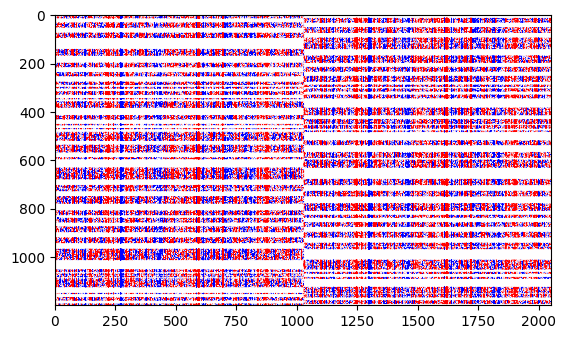

In [35]:
plt.imshow(X, vmin=-1, vmax=1, cmap='bwr')

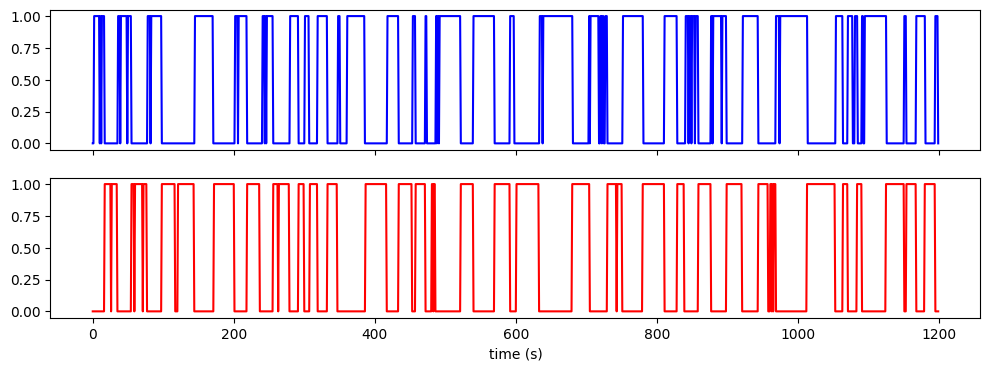

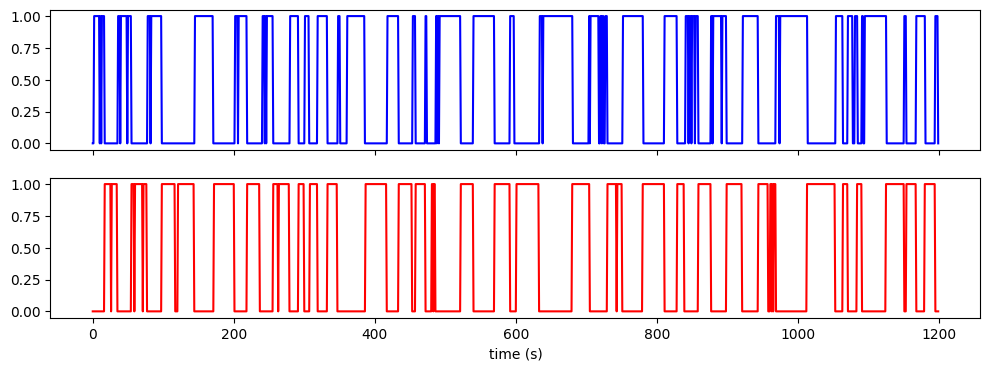

In [57]:
enc.plotboxcar(X[:, 0], X[:, 1])

# intersubject

In [ ]:
# load subA brain data and subB model
# use subB prod model with subA embeddings for comprehension

# ISC

In [36]:
import numpy as np
from util import subject
from himalaya.scoring import correlation_score

from neuromaps.datasets import fetch_fsaverage
# from neuromaps.transforms import mni152_to_fslr  # , mni152_to_fsaverage
from tqdm import tqdm
from surfplot import Plot
from surfplot.utils import threshold
import seaborn as sns

from constants import CONVS_STRANGERS


In [37]:
# 23 min
scores = []
for conv in tqdm(CONVS_STRANGERS):
    subA = subject.get_partner(conv)
    subB = conv
    dataA = subject.get_bold(subA)
    dataB = subject.get_bold(subB)
    for i in range(0, 1200, 240):
        scores.append(correlation_score(dataA[i: i+240], dataB[i:i+240]))

scores = np.vstack(scores)
scores.shape

(145, 81924)

In [49]:
np.save('vxv-isc.npy', scores)

In [24]:
surfaces = fetch_fsaverage(data_dir="mats", density="41k")
lh, rh = surfaces["inflated"]
sulc_lh, sulc_rh = surfaces['sulc']

/scratch/gpfs/zzada/conda-envs/fconv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/scratch/gpfs/zzada/conda-envs/fconv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

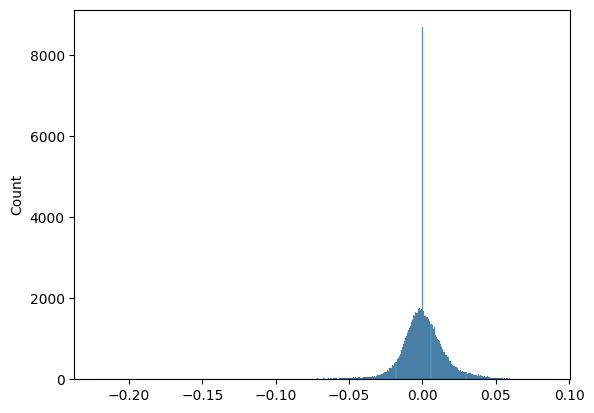

In [47]:
sns.histplot(scores.mean(0))

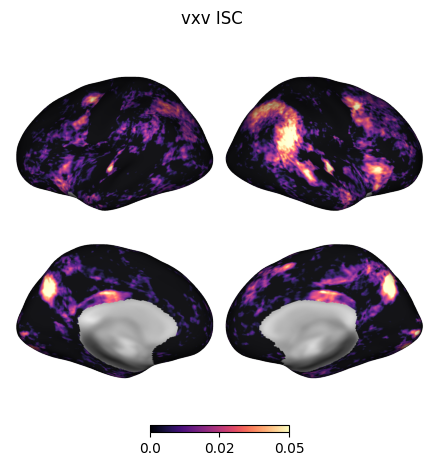

In [48]:
p = Plot(surf_lh=lh, surf_rh=rh, brightness=.7)
p.add_layer({'left': sulc_lh, 'right': sulc_rh}, cmap='binary_r', cbar=False)
p.add_layer(scores.mean(0), cmap='magma', color_range=(0, .05))
fig = p.build()
fig.suptitle('vxv ISC')
fig.show()